In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns
import numpy as np
import random
from sklearn import tree
from sklearn import metrics
from scipy import stats
import graphviz
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dff = df.drop(['species'],axis=1) # get only the features in the dataframe

In [4]:
classes = df.loc[:,"species"]

In [5]:
#X_train, X_test, y_train, y_test = train_test_split(dff, classes, test_size=0.33)
X_train, X_test, y_train, y_test = train_test_split(dff, classes, test_size=0.33, random_state=10)

In [6]:
type(X_train)

pandas.core.frame.DataFrame

In [7]:
#model = tree.DecisionTreeClassifier(criterion = 'gini')
model = tree.DecisionTreeClassifier(criterion = 'entropy', ranœdom_state=10, min_samples_leaf=3)
#model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=10, max_depth=10, min_samples_leaf=3)

In [8]:
model.fit(X_train, y_train)
sortedLabelList = sorted(list(set(classes)))
print(sortedLabelList)
metrics.confusion_matrix(y_true=y_train, y_pred=y_train, labels=sortedLabelList)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


array([[35,  0,  0],
       [ 0, 31,  0],
       [ 0,  0, 34]])

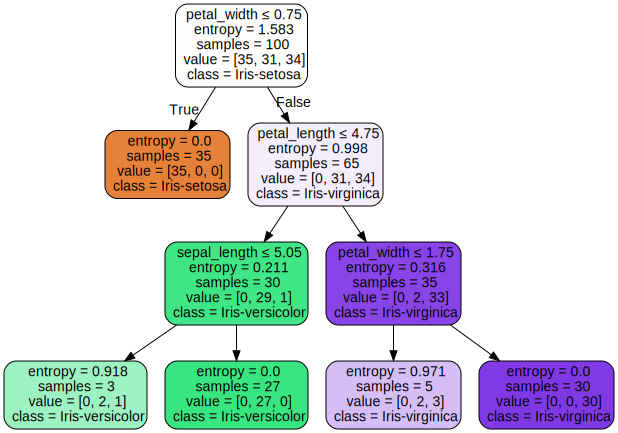

In [9]:
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=dff.columns,  
                         class_names=sortedLabelList, # needs to be lexicographically sorted
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)
graph
#graph.render("out_iris_decision_tree") # to generate a pdf

In [10]:
y_predict = model.predict(X_test)
print(y_predict[0:5])
print(metrics.accuracy_score(y_test, y_predict))

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa']
0.92


In [11]:
sortedLabelList = sorted(list(set(classes)))
metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList)

array([[15,  0,  0],
       [ 0, 15,  4],
       [ 0,  0, 16]])

In [12]:
sortedLabelList

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [13]:
pds.DataFrame(
    metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList),
    columns=['Predicted ' + className for className in sortedLabelList],
    index=['True ' + className for className in sortedLabelList]
)

,Predicted Iris-setosa,Predicted Iris-versicolor,Predicted Iris-virginica
True Iris-setosa,15,0,0
True Iris-versicolor,0,15,4
True Iris-virginica,0,0,16


In [14]:
print(metrics.classification_report(y_test, y_predict))  

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.79      0.88        19
 Iris-virginica       0.80      1.00      0.89        16

    avg / total       0.94      0.92      0.92        50

